In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook, plots are configured to be rendered as images because otherwise they won't display correctly on GitHub or when the notebook is loaded (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.


# Temperature forecasting with probabilistic LSTM


This notebook showcase the probabilistic LSTM of [Timeseria](https://github.com/sarusso/Timeseria).

Let's start by loading an example time series, and resample it to one hour:

In [2]:
from timeseria import TEST_DATASETS_PATH
from timeseria.datastructures import TimeSeries
timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'temperature.csv').resample('1h')

[INFO] timeseria.transformations: Using auto-detected sampling interval: 600.0s
[INFO] timeseria.transformations: Resampled 18331 DataTimePoints in 3189 DataTimePoints


Have a look at the time series we just loaded 

In [3]:
timeseries

Time series of #3189 points at 1h resolution, from point @ 1546480800.0 (2019-01-03 02:00:00+00:00) to point @ 1557957600.0 (2019-05-15 22:00:00+00:00)

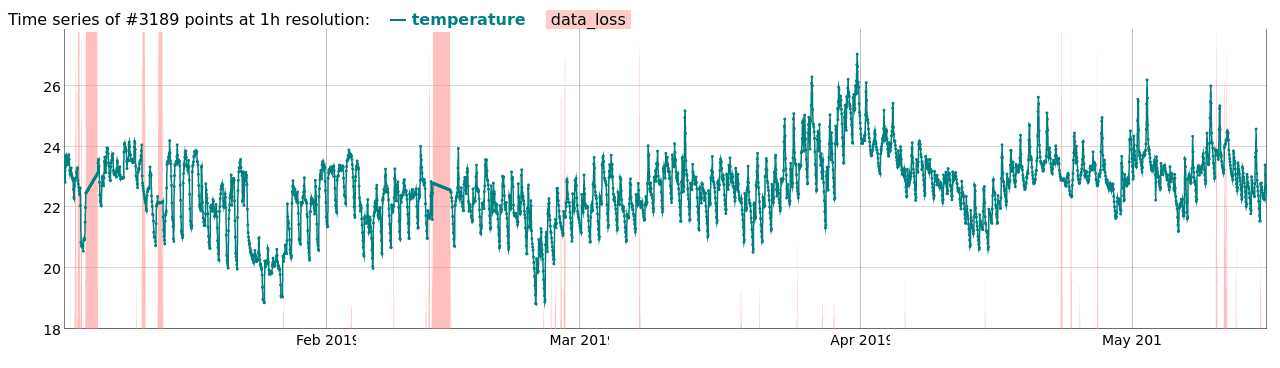

In [4]:
timeseries.plot()

Instantiate and fit the model

In [5]:
from timeseria.models import LSTMForecaster

forecaster = LSTMForecaster(window=24, features=['values', 'hours'])
forecaster.fit(timeseries, probabilistic=True)

Call the `predict()` function of the model. This returns key-value data with the prediction values

In [6]:
forecaster.predict(timeseries)

{'temperature': 22.286515695817716}

In this case, the predicitons are probabilistic:

In [7]:
type(forecaster.predict(timeseries)['temperature'])

timeseria.utils.PFloat

The PFloat (probabilistic float) class behaves as a standard float but with extra features, as the information about the original data distribution:

In [8]:
forecaster.predict(timeseries)['temperature'].dist

{'type': 'gennorm',
 'params': {'beta': 1.7673672985308246,
  'loc': 22.258715435250103,
  'scale': 0.2028322862313059},
 'pvalue': 0.31288984959280186}

PFloats can even be plotted, possibly together with the original data (if provided at creation-time):

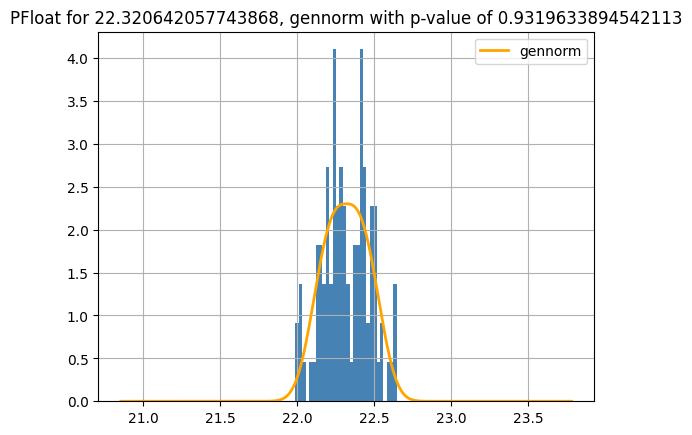

In [9]:
forecaster.predict(timeseries)['temperature'].plot()

PFloat objects are automatically handled by the plotting engine, so so that the time series resulting from an `apply()` call is plotted together with its probability intervals (by default, from 5% to 95%).

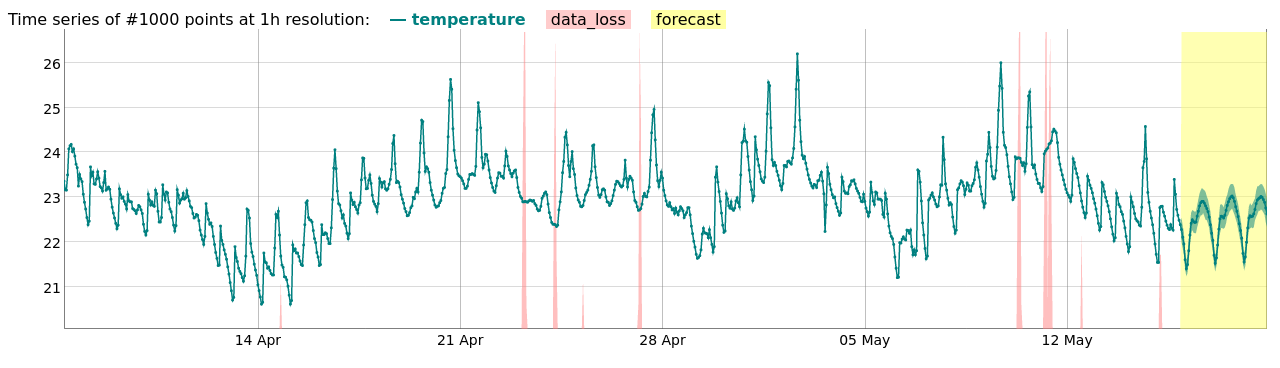

In [10]:
forecaster.apply(timeseries, steps=24*3)[-1000:].plot()

Custom probabilty intervals can be set with the ``probability_interval`` extra argument:

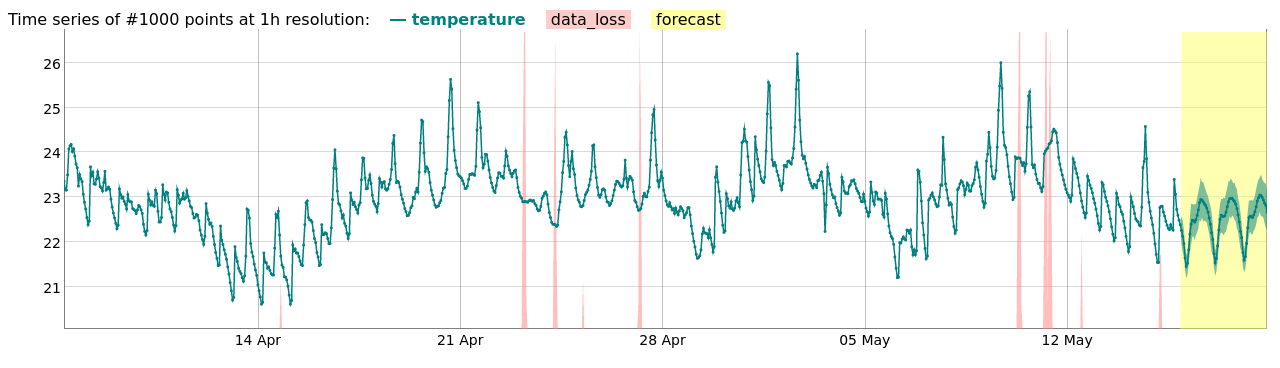

In [11]:
forecaster.apply(timeseries, steps=24*3)[-1000:].plot(probability_interval=[0.01,0.99])

...and should be required, probabilistic plotting can be entirely disabled:

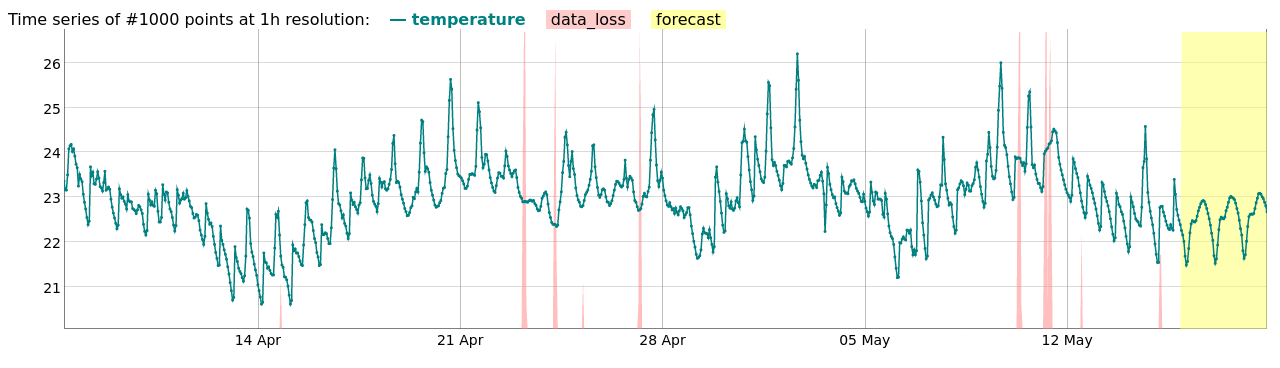

In [12]:
forecaster.apply(timeseries, steps=24*3)[-1000:].plot(probabilistic=False)